<a href="https://colab.research.google.com/github/bscruz/database-assignment/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Run this cell
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline




url = 'healthcare_dataset.csv'
df = pd.read_csv(url)

df.head(5)
df.tail(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [ ]:

# the graph shows that the most amount billed per medical condition was diabetes so I decided to look more into it


In [ ]:
Karen = df[df['Name']== 'kARen klInE']
print(Karen)

              Name  Age  Gender Blood Type Medical Condition  \
34613  kARen klInE   79  Female        AB+            Cancer   

      Date of Admission             Doctor          Hospital  \
34613        2021-06-19  Dr. Joseph Gordon  Hernandez-Morton   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
34613   UnitedHealthcare    52373.032374        181.0         Urgent   

      Discharge Date  Medication  Test Results  
34613     2021-07-03  Penicillin  Inconclusive  


In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,48501.000000,48500.000000,48500.000000
mean,51.597988,25563.788862,301.097711
std,19.575619,14213.507307,115.170124
min,18.000000,-2008.492140,101.000000
25%,35.000000,13250.792775,202.000000
50%,52.000000,25544.938022,302.000000
75%,69.000000,37850.164225,400.000000
max,85.000000,52764.276736,500.000000


In [ ]:
bill = df['Name'].count()
print(bill)

48501


In [ ]:
mostcost = df.groupby('Name')['Billing Amount'].sum().sort_values(ascending=False).head(5)
leastcost = df.groupby('Name')['Billing Amount'].sum().sort_values(ascending=True).head(5)
print(mostcost)
print(leastcost)

Name
LOrI coOK        66278.499363
DAvId muNoZ      58228.278846
tOdd CARrILlO    52764.276736
kARen klInE      52373.032374
PAUL SMith       52326.762663
Name: Billing Amount, dtype: float64
Name
james lUnA                 -2008.492140
joHn hahN                  -1520.420555
JOsEPH robBins             -1428.843941
tErRy WILSOn               -1316.618581
mr. ChRIStOPhER aLvARaDO   -1310.272895
Name: Billing Amount, dtype: float64


In [ ]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


                  Name  Age  Gender Blood Type Medical Condition  \
11      aaRon MARtiNeZ   38  Female         A-      Hypertension   
18        LuKE BuRgEss   34  Female         A-      Hypertension   
24      PAUl hEndERsOn   72  Female        AB+      Hypertension   
28         MaRy hUNter   38  Female         O-      Hypertension   
29       jOSHUA OLiVer   63  Female         B+      Hypertension   
...                ...  ...     ...        ...               ...   
48433      sArA wrIgHt   48    Male         A-      Hypertension   
48439  mIChELle GArCia   44  Female        AB-      Hypertension   
48471       aNna baker   38    Male        AB-      Hypertension   
48473    GEoRGe WiLson   58    Male         A-      Hypertension   
48486     JAMES cartEr   71  Female         A+      Hypertension   

      Date of Admission            Doctor                     Hospital  \
11           2023-08-13      Douglas Mayo                  Lyons-Blair   
18           2021-03-04  Justin Moo

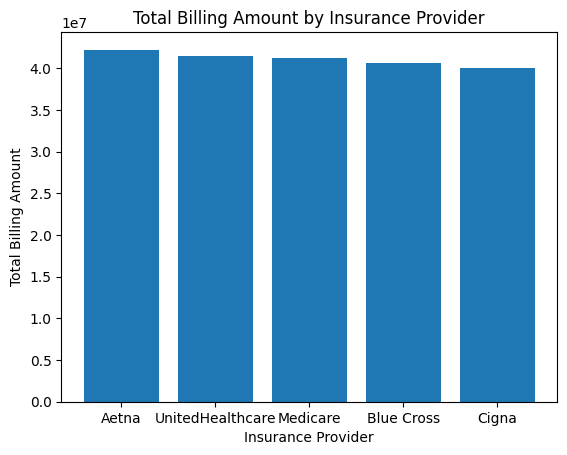

Medication
Ibuprofen      1635
Aspirin        1631
Lipitor        1614
Paracetamol    1607
Penicillin     1579
Name: count, dtype: int64


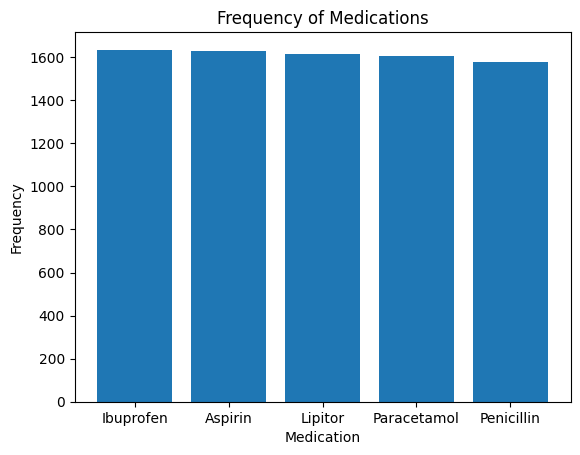

Medication
Ibuprofen      4.238964e+07
Lipitor        4.154326e+07
Aspirin        4.141368e+07
Paracetamol    4.017598e+07
Penicillin     4.012063e+07
Name: Billing Amount, dtype: float64


In [ ]:
from re import A
hypertension = df[df['Medical Condition'] == 'Hypertension']


print(hypertension)
df_unique = hypertension.drop_duplicates(subset='Name', keep='first')
insurance = df_unique['Insurance Provider'].value_counts()
print(insurance)

# so it shows the number one insurance provider for people with hypertesion was United Healthercare

costly = df.groupby(hypertension['Insurance Provider'])['Billing Amount'].sum().sort_values(ascending=False).head(5)
print(costly)

# shows which insurance is the one that billed people the most which was Aetna

plt.bar(costly.index, costly.values)
plt.xlabel('Insurance Provider')
plt.ylabel('Total Billing Amount')
plt.title('Total Billing Amount by Insurance Provider')
plt.set_yticks(, labels= ['208.97 million','208.09 million', '208.08 million','206.44 million','205.64 million','202.63 million'])
plt.show()


medication = hypertension['Medication'].value_counts()
print(medication)

plt.bar(medication.index, medication.values)
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Frequency of Medications')
plt.show()

costmed = df.groupby(hypertension['Medication'])['Billing Amount'].sum().sort_values(ascending=False).head(5)
print(costmed)

# iburprofen was billed the most







Medication
Lipitor        1661
Penicillin     1645
Aspirin        1629
Ibuprofen      1626
Paracetamol    1576
Name: count, dtype: int64


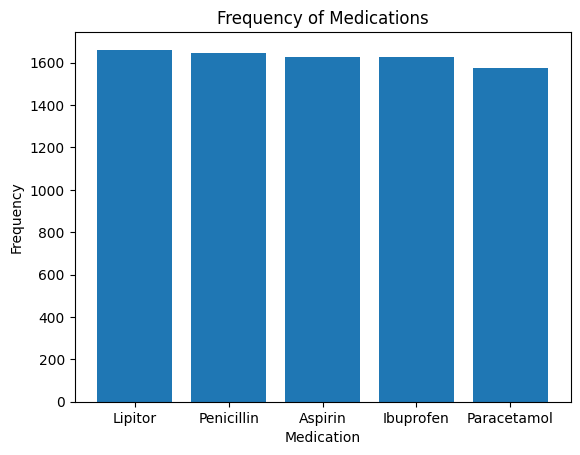

In [ ]:
medication = diabetes['Medication'].value_counts()
print(medication)

#frequency of medications given to people with diabetes

plt.bar(medication.index, medication.values)
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Frequency of Medications')
plt.show()

                      Name  Age  Gender Blood Type Medical Condition  \
3             andrEw waTtS   28  Female         O+          Diabetes   
6           edwArD EDWaRDs   21  Female        AB-          Diabetes   
12           connOR HANsEn   75  Female         A+          Diabetes   
27       mr. KenNEth MoORE   34  Female         A+          Diabetes   
34        NicOlE RodriGUEz   30  Female        AB+          Diabetes   
...                    ...  ...     ...        ...               ...   
55433    RonALd OBRIeN jr.   72  Female         B+          Diabetes   
55439    cHRiStINE MCCARty   75    Male        AB+          Diabetes   
55462        alYSsA mIlLER   35  Female         A-          Diabetes   
55480         LAurEn mills   33  Female         B-          Diabetes   
55483  kimbErlY RIchArDSoN   15    Male         A-          Diabetes   

      Date of Admission               Doctor                      Hospital  \
3            2020-11-18          Kevin Wells    Hernandez

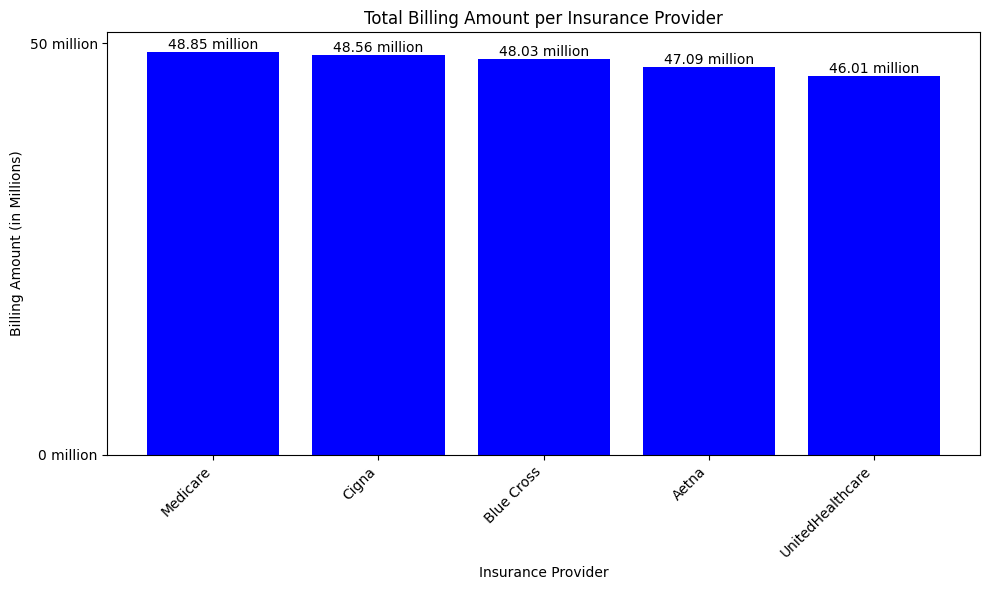

Insurance Provider
Aetna               1668
Blue Cross          1683
Cigna               1679
Medicare            1730
UnitedHealthcare    1624
Name: Name, dtype: int64
8384
Insurance Provider
Aetna               8.370193e+06
Blue Cross          8.847861e+06
Cigna               9.281159e+06
Medicare            8.444871e+06
UnitedHealthcare    8.586646e+06
Name: Billing Amount, dtype: float64
Insurance Provider
Aetna               341
Blue Cross          335
Cigna               352
Medicare            339
UnitedHealthcare    335
Name: Medication, dtype: int64
Insurance Provider
Aetna               24546.02
Blue Cross          26411.53
Cigna               26366.93
Medicare            24911.12
UnitedHealthcare    25631.78
dtype: float64
Total number of unique diabetes patients: 8384

Average Billing Amount per Medication:
Insurance Provider
Aetna               24546.02
Blue Cross          26411.53
Cigna               26366.93
Medicare            24911.12
UnitedHealthcare    25631.78
dtype

In [ ]:
diabetes = df[df['Medical Condition'] == 'Diabetes']
print(diabetes)
df_unique = diabetes.drop_duplicates(subset='Name', keep='first')


newdf = diabetes[['Medication', 'Insurance Provider', 'Billing Amount']]


import numpy as np
import matplotlib.pyplot as plt

# Group by 'Insurance Provider'
billed = newdf.groupby('Insurance Provider')['Billing Amount'].sum().sort_values(ascending=False)

new_var = billed.values / 1e6
labels = [f"{val:.2f} million" for val in new_var]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(billed.index, new_var, color='blue')


ax.set_yticks(np.arange(0, max(new_var) + 50, step=50))
ax.set_yticklabels([f"{int(val)} million" for val in np.arange(0, max(new_var) + 50, step=50)])


ax.set_xticks(np.arange(len(billed.index)))
ax.set_xticklabels(billed.index, rotation=45, ha='right')

# Add labels to bars
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', fontsize=10)


ax.set_xlabel('Insurance Provider')
ax.set_ylabel('Billing Amount (in Millions)')
ax.set_title('Total Billing Amount per Insurance Provider')

plt.tight_layout()
plt.show()

# shows number of people with diabetes
diabetes_by_insurance = df_unique.groupby('Insurance Provider')['Name'].count()
total_unique_diabetes = df_unique['Name'].nunique()
print(diabetes_by_insurance)
print(total_unique_diabetes)

#shows number of people prescriped LIpitor and the amount billed for lipitor medication

lipitorprovided = df_unique[df_unique['Medication'] == 'Lipitor']
billing = lipitorprovided.groupby('Insurance Provider')['Billing Amount'].sum()
print(billing)
lipitorprovided = lipitorprovided.groupby('Insurance Provider')['Medication'].count()
print(lipitorprovided)

# shows how much it cost on average for a person to be perscriped lipitor compared to its insurance provider
avg_billing_per_medication = (billing / lipitorprovided).round(2)
print(avg_billing_per_medication)
print(f"Total number of unique diabetes patients: {total_unique_diabetes}")


print("\nAverage Billing Amount per Medication:")
print(avg_billing_per_medication)


print(diabetes_by_insurance)


                     Name  Age  Gender Blood Type Medical Condition  \
29          jOSHUA OLiVer   63  Female         B+      Hypertension   
37     CasSAndrA Robinson   26  Female         B-      Hypertension   
57          MIChael MIllS   23    Male         O-      Hypertension   
59      jACqUeLINE jORdaN   51    Male         O+      Hypertension   
81            ChAd MorEnO   67    Male        AB+      Hypertension   
...                   ...  ...     ...        ...               ...   
48337       madISon lUcas   85  Female         O+      Hypertension   
48373       NIcHolAs COLE   65    Male         B-      Hypertension   
48383   dR. KELly menDoza   33    Male        AB+      Hypertension   
48386         SusAn lOPeZ   20    Male         A+      Hypertension   
48473       GEoRGe WiLson   58    Male         A-      Hypertension   

      Date of Admission               Doctor                      Hospital  \
29           2023-10-03      Brandy Mitchell                Guerrero-

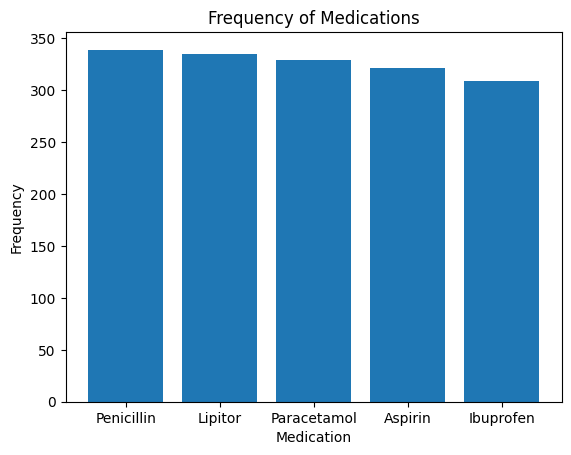

In [ ]:
aetna = hypertension[hypertension['Insurance Provider'] == 'Aetna']
print(aetna)

medication_billing = newdf.groupby(['Insurance Provider', 'Medication'])['Billing Amount'].sum().reset_index()


aetnamed = aetna['Medication'].value_counts()
print(aetnamed)

plt.bar(aetnamed.index, aetnamed.values)
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.title('Frequency of Medications')
plt.show()

# so aetna provided paracetmol more often to people with hypertension while
#iburprofen was the most prescribed medication overall for others insurance providers







Admission Type
Elective     2801
Urgent       2666
Emergency    2599
Name: count, dtype: int64


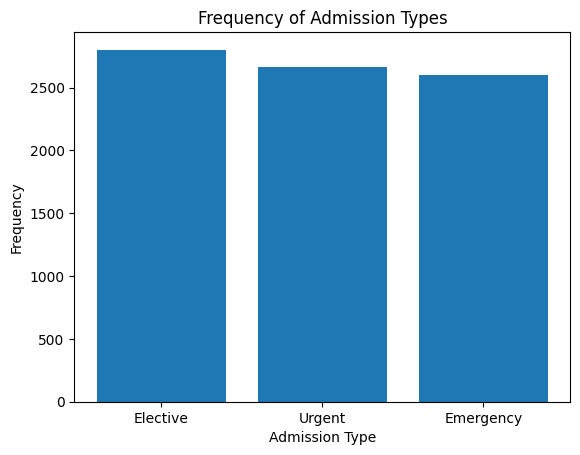

In [ ]:
admissiontype = hypertension['Admission Type'].value_counts()
print(admissiontype)

plt.bar(admissiontype.index, admissiontype.values)
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.title('Frequency of Admission Types')
plt.show()

# most people with hypertension were being admitted under elective

Medical Condition  Admission Type
Arthritis          Urgent            2742
                   Elective          2739
                   Emergency         2695
Asthma             Elective          2717
                   Urgent            2691
                   Emergency         2619
Cancer             Elective          2732
                   Urgent            2679
                   Emergency         2623
Diabetes           Urgent            2818
                   Elective          2691
                   Emergency         2628
Hypertension       Elective          2801
                   Urgent            2666
                   Emergency         2599
Obesity            Emergency         2730
                   Urgent            2680
                   Elective          2650
Name: count, dtype: int64


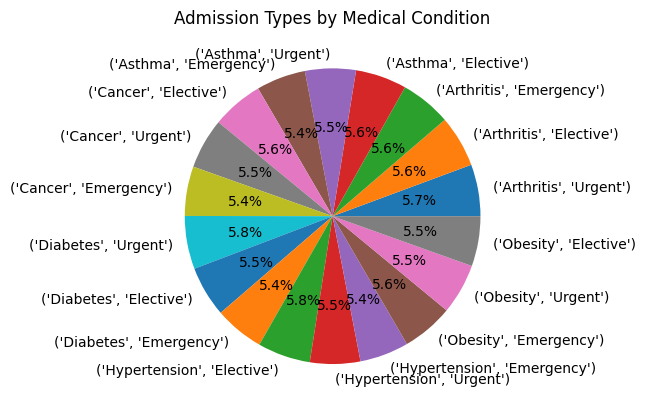

Admission Type
Elective     25639.599609
Emergency    25523.420870
Urgent       25527.147142
Name: Billing Amount, dtype: float64


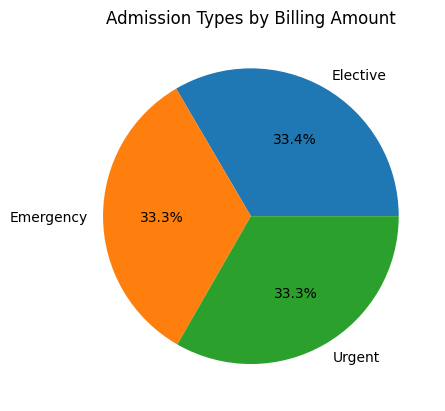

In [ ]:
med_admission = df.groupby('Medical Condition')['Admission Type'].value_counts()
print(med_admission)
plt.pie(med_admission, labels=med_admission.index, autopct='%1.1f%%')
plt.title('Admission Types by Medical Condition')
plt.show()

#Admission by Elective was the one that was the most billed
admissionavg = df.groupby('Admission Type')['Billing Amount'].mean()
print(admissionavg)
plt.pie(admissionavg, labels=admissionavg.index, autopct='%1.1f%%')
plt.title('Admission Types by Billing Amount')
plt.show()
# hypertension with an admission of elective was the most frequent this could be why
# it was billed the most

                   Name  Age  Gender Blood Type Medical Condition  \
12        connOR HANsEn   75  Female         A+          Diabetes   
38        NIcOlE LUcErO   70  Female         O-          Diabetes   
47           CHRis fRYe   58    Male         A-          Diabetes   
77       apRil SANTIAgO   33  Female         B-          Diabetes   
133       SEaN carDenaS   55    Male         B-          Diabetes   
...                 ...  ...     ...        ...               ...   
48290     tHomaS mOreNO   22    Male         O-          Diabetes   
48323   KimBErlY NORMan   49    Male         A-          Diabetes   
48403      DereK tayLor   68    Male         O-          Diabetes   
48417  KiMbeRLY JimENez   44  Female         B-          Diabetes   
48454   MELAnIe JackSOn   32    Male         B-          Diabetes   

      Date of Admission                 Doctor                       Hospital  \
12           2019-12-12       Kenneth Fletcher      Powers Miller, and Flores   
38       

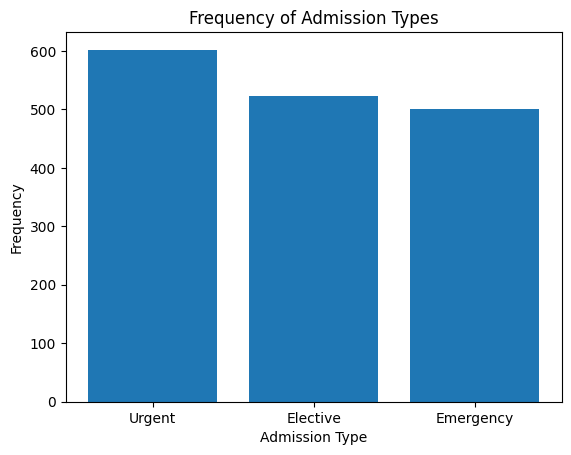

Medical Condition  Admission Type
Diabetes           Urgent            602
                   Elective          523
                   Emergency         501
Name: count, dtype: int64


In [ ]:
cigna = diabetes[diabetes['Insurance Provider'] == 'Cigna']
print(cigna)
new = cigna['Admission Type'].value_counts()
print(cigna)
plt.bar(new.index, new.values)
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.title('Frequency of Admission Types')
plt.show()
med_admission = cigna.groupby('Medical Condition')['Admission Type'].value_counts()
print(med_admission)




Insurance Provider  Medication
Aetna               Lipitor       334
Blue Cross          Lipitor       331
Cigna               Lipitor       343
Medicare            Lipitor       327
UnitedHealthcare    Lipitor       326
Name: count, dtype: int64


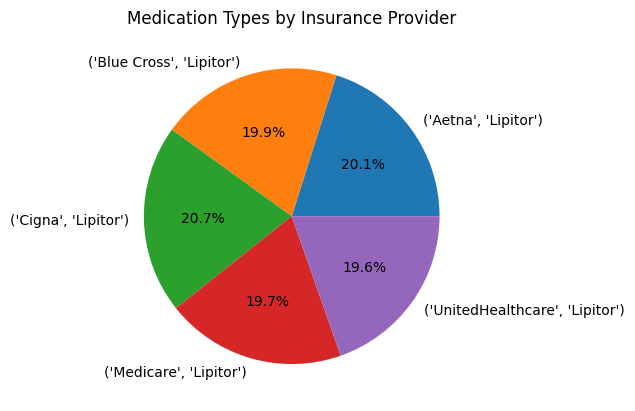

In [ ]:
lipitor = diabetes[diabetes['Medication'] == 'Lipitor']
lipitorprovided = lipitor.groupby('Insurance Provider')['Medication'].value_counts()
print(lipitorprovided)
plt.pie(lipitorprovided, labels=lipitorprovided.index, autopct='%1.1f%%')
plt.title('Medication Types by Insurance Provider')
plt.show()

#stacked bar graph


#Liptor had second largest billed amount for medication under the insurance Cigna.
#In spite of Cigna having the third largest number of patients it was gaining the most amount
#of money by providing the Lipitor medication. Cigna was providing Lipitor medication at a higher amount than other insrance providers.


In [ ]:
# Filter for rows where the medication is Lipitor

<ipython-input-95-c68636e1f39a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipitor_data['Billing Amount'] = pd.to_numeric(lipitor_data['Billing Amount'], errors='coerce')


KeyError: 'Quantity'

Series([], Name: count, dtype: int64)
             Aetna  Cigna  Blue  medicare
Medication                               
Aspirin        322    331   324       344
Ibuprofen      316    326   333       342
Lipitor        334    343   331       327
Paracetamol    311    306   331       331
Penicillin     337    320   323       336


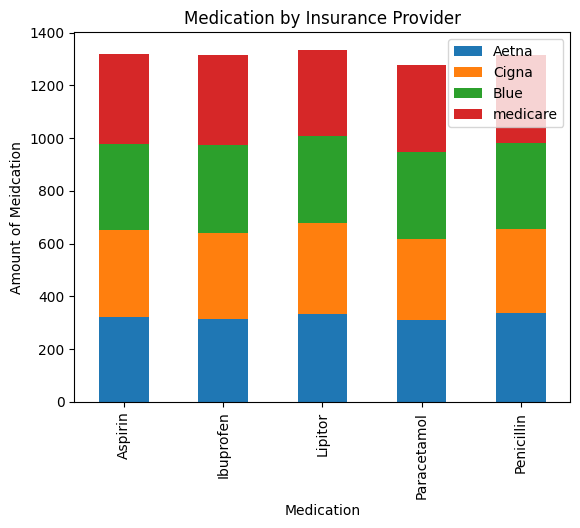

  Insurance Provider   Medication  Billing Amount
0           Medicare      Aspirin    9.457589e+06
1              Cigna      Lipitor    9.082184e+06
2              Aetna  Paracetamol    8.867247e+06
3         Blue Cross      Lipitor    8.733414e+06
4         Blue Cross    Ibuprofen    8.709043e+06
5              Aetna   Penicillin    8.694153e+06
6           Medicare    Ibuprofen    8.560511e+06
7           Medicare   Penicillin    8.532678e+06


In [ ]:
costmed = df.groupby(diabetes['Medication'])['Billing Amount'].sum().sort_values(ascending=False).head(5)
medamount = df.groupby(diabetes['Insurance Provider'])['Medication'].value_counts()
aetna = diabetes[diabetes['Insurance Provider'] == 'Aetna']
aetna_meds = aetna['Medication'].value_counts()
cigna = diabetes[diabetes['Insurance Provider'] == 'Cigna']
cigna_meds = cigna['Medication'].value_counts()
united = diabetes[diabetes['Insurance Provider'] == 'UnitedHealthcareCare']
united_meds = united['Medication'].value_counts()
blue= diabetes[diabetes['Insurance Provider'] == 'Blue Cross']
blue_meds = blue['Medication'].value_counts()
medicare = diabetes[diabetes['Insurance Provider'] == 'Medicare']
medicare_meds = medicare['Medication'].value_counts()

print(united_meds)

create = {'Aetna': aetna_meds, 'Cigna': cigna_meds, 'Blue': blue_meds, 'medicare': medicare_meds}
create = pd.DataFrame(create)



print(create)

#stacked bar for medamount
create.plot(kind='bar', stacked=True)
plt.xlabel('Medication')
plt.ylabel('Amount of Meidcation')
plt.title('Medication by Insurance Provider')
plt.show()

newdf = diabetes[['Medication', 'Insurance Provider', 'Billing Amount']]

medication_billing = newdf.groupby(['Insurance Provider', 'Medication'])['Billing Amount'].sum().sort_values(ascending=False).head(8).reset_index()
print(medication_billing)


3    208.97 Million
0    208.09 Million
5    208.08 Million
1    206.44 Million
4    205.64 Million
2    202.63 Million
Name: Billing Amount, dtype: object


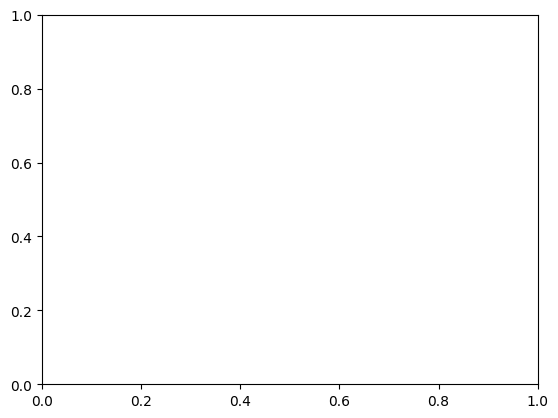

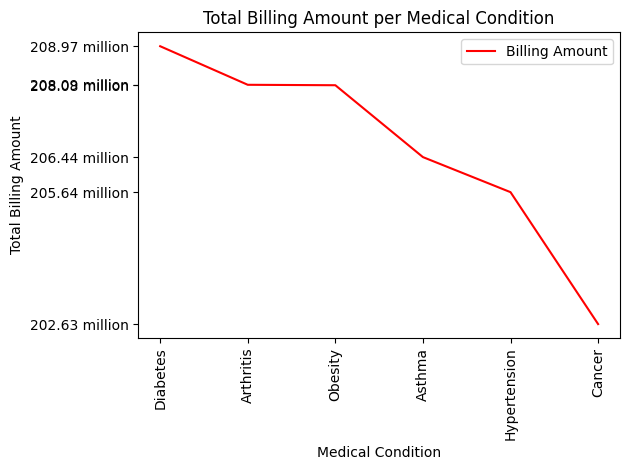

In [ ]:
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index()

billing_by_condition = billing_by_condition.sort_values(by='Billing Amount', ascending=False)

# Convert the 'Cost' column to numeric
billed_by_condion = pd.to_numeric(billing_by_condition['Billing Amount'], errors='coerce')

# Now divide by 1e6 to get millions
billed_by_condion= billed_by_condion / 1e6
billed_by_condion = billed_by_condion.round(2)

billing_by_condition['Billing Amount'] = billed_by_condion

million = (billed_by_condion.astype(str) + ' Million')
print(million)

fig, ax = plt.subplots()
ax = billing_by_condition.plot(x='Medical Condition', y='Billing Amount', kind='line',
                               color='red', title='Total Billing Amount per Medical Condition')
ax.set_xlabel('Medical Condition')
ax.set_ylabel('Total Billing Amount')
new_var = billing_by_condition['Billing Amount']
ax.set_yticks(new_var, labels= ['208.97 million','208.09 million', '208.08 million','206.44 million','205.64 million','202.63 million'])
plt.xticks(rotation=90)
plt.tight_layout()







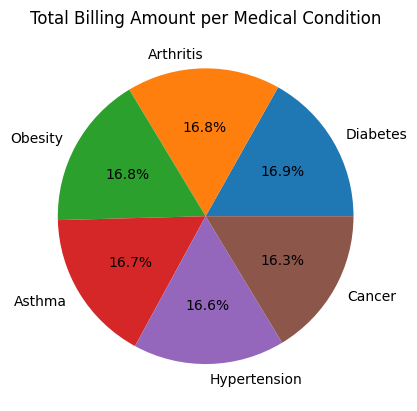

In [ ]:

billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index()

billing_by_condition = billing_by_condition.sort_values(by='Billing Amount', ascending=False)

